## Import the necessary modules.
Specify the version of the config file (it will set the OA-version dependent names, e.g. plot tag, output directory name etc)

In [1]:
config='configuration_OA2023.yaml'
from pythetatools.config import load_config, inputs_dir, outputs_dir
load_config(f"{inputs_dir}/config_files/{config}")
from pythetatools.config import CONFIG

In [3]:
#import "header" script
from analysis_scripts import save_and_plot_llh

#import necessary modules from pythetatools
import pythetatools.likelihood as likelihood
from pythetatools.config_visualisation import *
from pythetatools.file_manager import read_cont

import os
from matplotlib import pyplot as plt

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

## Set input path
(output path is the same as the input as we want to save the dchi2 in the same files)

In [4]:
basedir = f"{inputs_dir}/{CONFIG.dir_ver}/MargTemplates"


## Read MargTemplates and save the log-likelihood in hist.root in cont histogram

Number of entries in 'MargTemplate': 1640.
Grid sizes: [41] for parameters ['dm2']
Objects written in /Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_DataFit_dm2_100k_p-theta_mode_0/hist.root
Objects written in /Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_DataFit_dm2_100k_p-theta_mode_0/hist_IH.root
Histograms saved to ROOT files.


Warning in <TROOT::Append>: Replacing existing TH1: cont (Potential memory leak).


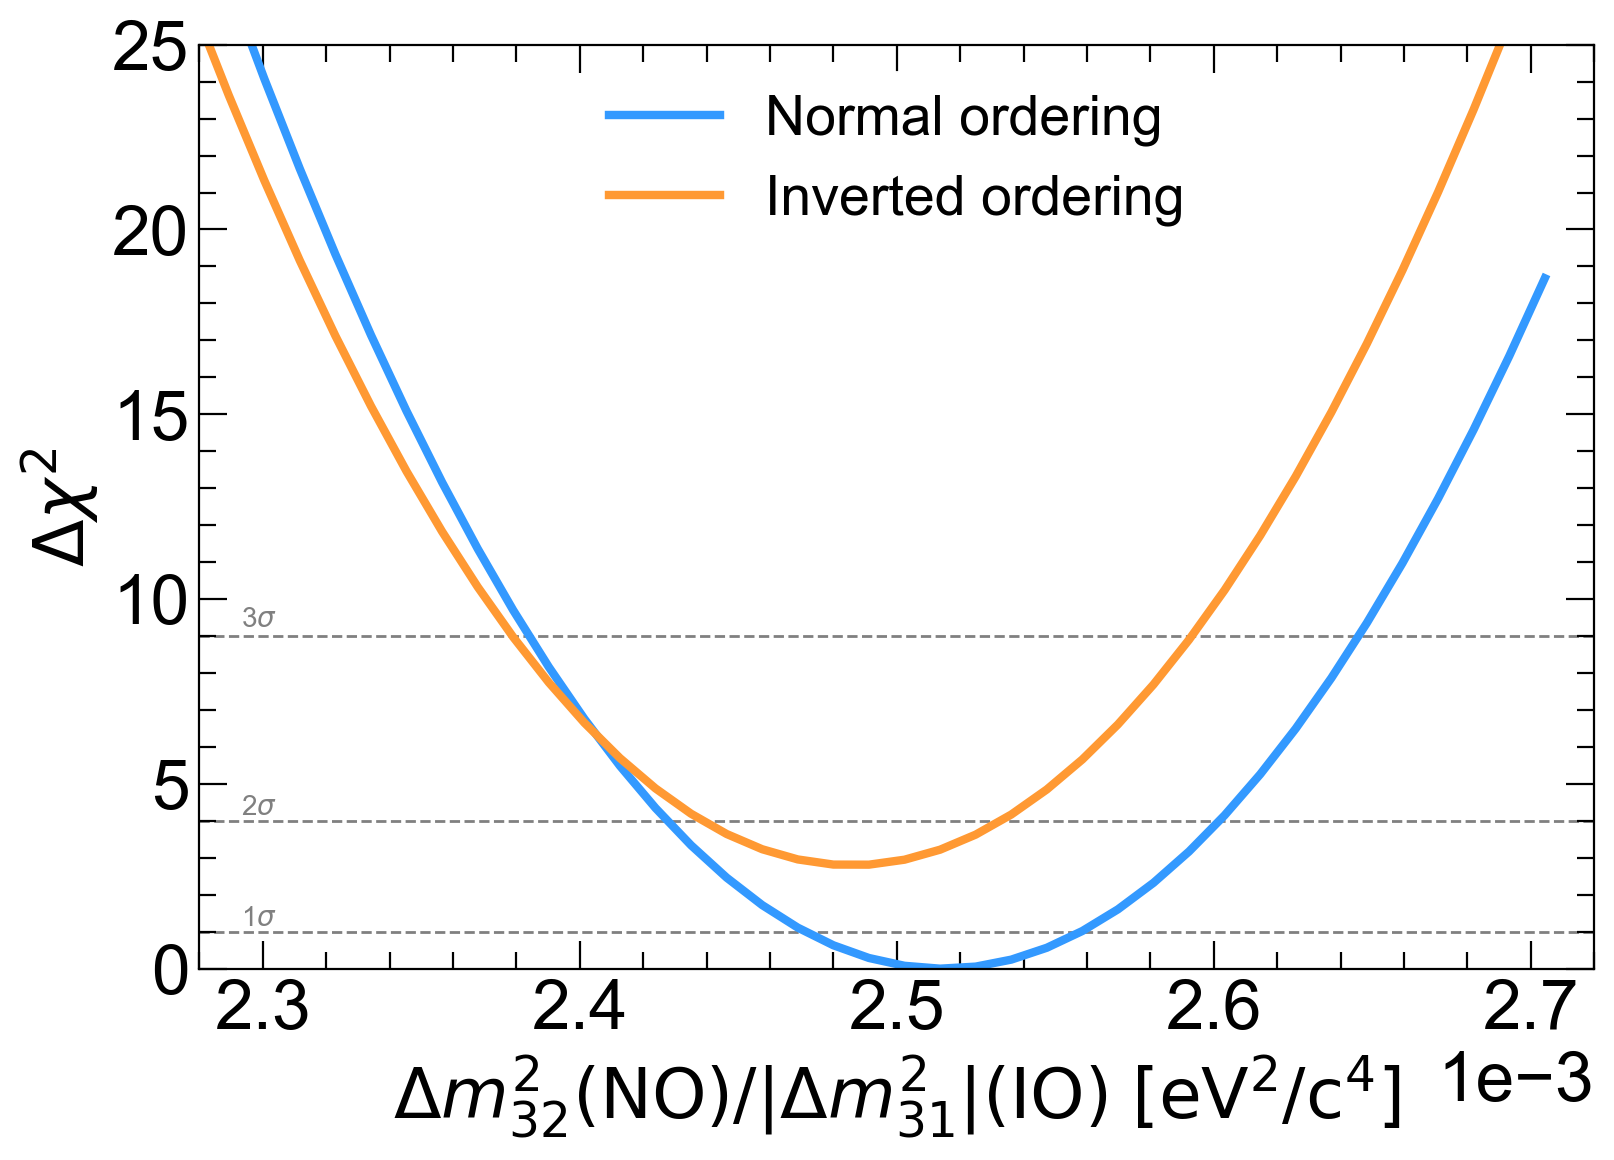

In [6]:
indir = f"{basedir}/MargTemplates_DataFit_dm2_100k_p-theta_mode_0"
file_pattern = f"{indir}/marg*.root"

grid, avnllh, param_name = likelihood.load(file_pattern)
llh = likelihood.Loglikelihood(grid, avnllh, param_name, mo_treat='joint')

fig, ax = plt.subplots()

#Plot llh to check what is saved
llh.plot(ax, wtag=False, show_const_critical=True)
save_and_plot_llh.save_avnll_hist(llh, indir)


## Smear the contours (only for dm2)
It is done using the C++ macro.

In [7]:
if 'dm2' in param_name:
    smeared = True
    smear_factor = 3.3e-5
    save_and_plot_llh.smear_contour(indir, smear_factor=smear_factor, compile=False)
    

Saved /Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_DataFit_dm2_100k_p-theta_mode_0/hist_smeared_3.3e-05.root
Saved /Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_DataFit_dm2_100k_p-theta_mode_0/hist_IH_smeared_3.3e-05.root
TFile**		/Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_DataFit_dm2_100k_p-theta_mode_0/hist.root	
 TFile*		/Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_DataFit_dm2_100k_p-theta_mode_0/hist.root	
  OBJ: TH1D	cont	cont : 0 at: 0x130eb68a0
  KEY: TH1D	cont;1	cont
  KEY: TParameter<int>	xParam;1	
  KEY: TObjString	xParamName;1	Collectable string class
Original number of bins: x=41
Target number of bins: x=410
0.1
TFile**		/Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_DataFit_dm2_100k_p-theta_mode_0/hist_IH.root	
 TFile*		/Users/denis.carabadjac/Python/pythetatools/inputs/OA

Error in <TClass::LoadClassInfo>: no interpreter information for class TH2 is available even though it has a TClass initialization routine.
Error in <TClass::LoadClassInfo>: no interpreter information for class TH2 is available even though it has a TClass initialization routine.
Error in <TClass::LoadClassInfo>: no interpreter information for class TH2 is available even though it has a TClass initialization routine.
Error in <TClass::LoadClassInfo>: no interpreter information for class TH2 is available even though it has a TClass initialization routine.
Error in <TClass::LoadClassInfo>: no interpreter information for class TH2 is available even though it has a TClass initialization routine.
Error in <TClass::LoadClassInfo>: no interpreter information for class TH2 is available even though it has a TClass initialization routine.


### Plot the smeared contour

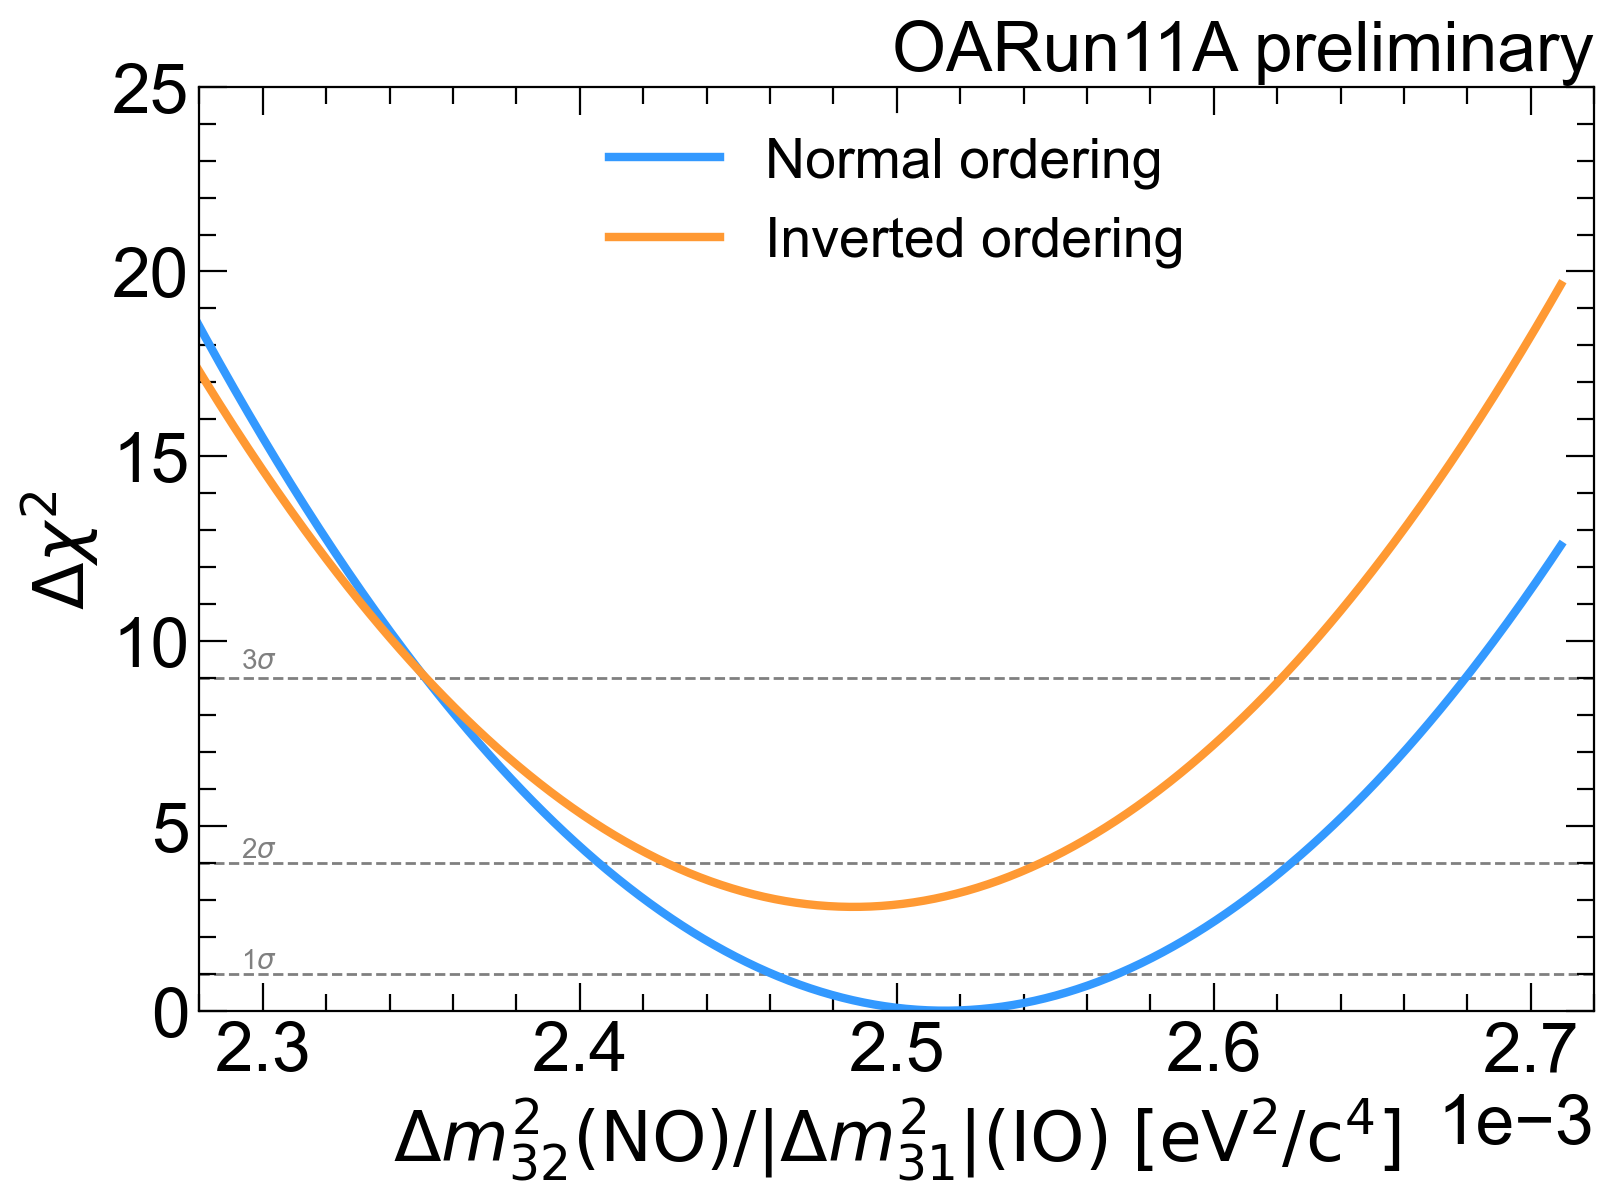

In [8]:
if 'dm2' in param_name:
    mo_to_suffix = {0:'', 1:'_IH'}
    smeared_postfix = {False: '', True: f'_smeared_{smear_factor}'}
    
    avnllh = {}
    
    for mo in [0, 1]:
        bin_edges, double_avnllh, param_names = read_cont(os.path.join(indir, f'hist{mo_to_suffix[mo]}{smeared_postfix[smeared]}.root'))
        avnllh[mo] = double_avnllh/2
    grid = [(bin_edges[i][1:]+bin_edges[i][:-1])/2 for i in range(len(bin_edges))]
    llh = likelihood.Loglikelihood(grid, avnllh, param_names, mo_treat='joint')
    
    fig, ax = plt.subplots()
    llh.plot(ax, wtag=True)